In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def import_vibs(pathname,filename):
    f = open(pathname+filename,'r').readlines()
    vibs = []
    for line in f[1:]:
        line = line.split()
        vibs.append(float(line[2]))
    return vibs

In [3]:
def Gvibs(vibs,T):
    kB = 8.617333262e-5 # eV/K
    qvibs = 1
    for item in vibs:
        qvibs = qvibs*(np.exp(-item/(2000*kB*T))/(1-np.exp(-item/(1000*kB*T))))
    Gvibs = -kB*T*np.log(qvibs)
    return Gvibs

In [4]:
def Gads_calc(T,P_GA,vibs_GA_gas,vibs_ads,nads,Eads,Nsites,theta):
    kB = 8.617333262e-5 # eV/K
    kB_SI = 1.380649e-23 # J/K
    h_SI = 6.62607015e-34 # J*s
    mGA = 76.05/1000/6.022e23 # kg/molec.
    IaIbIc_GA = 4555*10**(-117) # g^3*cm*6, from J.Phys.Chem.Ref.Data,Vol.30,No.2,2001
    IaIbIc_GA = IaIbIc_GA/(1000)**3/(100)**6 # kg^3*m^6
    sig_GA = 1
    Gads = []
    for item in T:
        ### GA gas translational component
        qtrans = (2*np.pi*mGA*kB_SI*item/h_SI**2)**(3/2)*(kB_SI*item/P_GA)
        Gtrans_gas = -kB*item*np.log(qtrans)
    
        ### GA gas rotational component
        qrot = (8*np.pi**2/sig_GA)*(2*np.pi*kB_SI*item/h_SI**2)**(3/2)*IaIbIc_GA**(1/2)
        Grot_gas = -kB*item*np.log(qrot)
    
        ### GA gas vibrational component
        Gvibs_gas = Gvibs(vibs_GA_gas,item)
    
        ### Adsorbate vibrational component
        Gvibs_ads = Gvibs(vibs_ads,item)

        ### Adsorbate configurational component
        if (theta < 1) and (theta >0):
            Gconf = -kB*item*Nsites*((theta - 1)*np.log(1-theta) - theta*np.log(theta))
        else:
            Gconf = 0
    
        ### Gibbs free total adsorption energy
        Gads.append(nads*Eads + Gconf + Gvibs_ads - nads*(Gtrans_gas + Grot_gas + Gvibs_gas))
    return Gads

-0.30195700000000003
-0.24491700000000005
[-0.2523041310226095, -0.24820351892103965, -0.2419045965668276, -0.2336829105407574, -0.223847039076003, -0.21267039451294867, -0.2003777661552708, -0.1871497836388083, -0.17313144542922232, -0.15844010464018488]


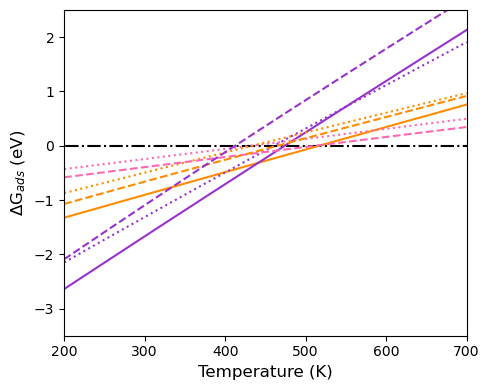

In [55]:
T = np.linspace(200,700,10) # K
Eads = [-1.084645,-1.16053725,-0.756016,-0.782688,-0.927154,-0.828206,-0.839728,-0.925167] # eV/molec, [1molup,2moldim,4moldim,2molup,4molup,1molate,2molate,4molate]
nads = [2,4,1,2,4,1,2,4] # number of molec
Nsites = 16 # number of sites in supercell
rel_nads = [6,12,2,4,8,3,6,12] # number of sites occupied by the configuration
max_nads_est = max(rel_nads)
rel_cov = [item/max_nads_est for item in rel_nads]
P_GA = (10**-2)*10**5 # Pa

### vibs import
vibs_GA_gas = import_vibs('./VIBs/','vib_GAgas.txt')
vibs_GA_gas = vibs_GA_gas[:21] # for non-linear molecule only 3N-6 vibrational modes

vibs_GA_1mol_up = import_vibs('./VIBs/','vib_GA1molup.txt')
vibs_GA_1mol_up = vibs_GA_1mol_up[:-2] # some structures have 2 imaginary modes, dropping last 2 modes from all

vibs_GA_2mol_dim = import_vibs('./VIBs/','vib_2moldimerGA.txt')
vibs_GA_2mol_dim = vibs_GA_2mol_dim[:-2]

vibs_GA_4mol_dim = import_vibs('./VIBs/','vib_4moldimerGA.txt')
vibs_GA_4mol_dim = vibs_GA_4mol_dim[:-2]

vibs_GA_2mol_up = import_vibs('./VIBs/','vib_2moluprightGA.txt')
vibs_GA_2mol_up = vibs_GA_2mol_up[:-2]

vibs_GA_4mol_up = import_vibs('./VIBs/','vib_4moluprightGA.txt')
vibs_GA_4mol_up = vibs_GA_4mol_up[:-2]

vibs_GA_1mol_ate = import_vibs('./VIBs/','vib_GAate1mol.txt')
vibs_GA_1mol_ate = vibs_GA_1mol_ate[:-2]

vibs_GA_2mol_ate = import_vibs('./VIBs/','vib_GAate2mol.txt')
vibs_GA_2mol_ate = vibs_GA_2mol_ate[:-2]

vibs_GA_4mol_ate = import_vibs('./VIBs/','vib_GAate4mol.txt')
vibs_GA_4mol_ate = vibs_GA_4mol_ate[:-2]

### calculation go!
vibs_ads = [vibs_GA_2mol_dim,vibs_GA_4mol_dim,vibs_GA_1mol_up,vibs_GA_2mol_up,vibs_GA_4mol_up,vibs_GA_1mol_ate,vibs_GA_2mol_ate,vibs_GA_4mol_ate]
labs = ['Dimer - 0.1250 ML','Dimer - 0.2500 ML','Upright - 0.0625 ML','Upright - 0.1250 ML','Upright - 0.2500 ML','Carboxylate - 0.0625 ML','Carboxylate - 0.1250 ML','Carboxylate - 0.2500 ML']
cols = ['darkorange','darkorchid'] + ['hotpink','darkorange','darkorchid'] + ['hotpink','darkorange','darkorchid']
lines = ['-']*2 + [':']*3 + ['--']*3
# plt.figure(figsize=(9.38,5.5))
plt.figure(figsize=(5,4))
for ii in range(0,len(Eads)):
    Gads = Gads_calc(T,P_GA,vibs_GA_gas,vibs_ads[ii],nads[ii],Eads[ii],Nsites,rel_cov[ii]) 
    ### plot results
    plt.plot(T,Gads,color=cols[ii],linestyle=lines[ii],label=labs[ii],linewidth=1.5,zorder=2)
    if ii == 0:
        dim_save = Gads
    if ii == 3:
        up_save = Gads
    if ii == 6:
        ate_save = Gads

plt.hlines(0,100,800,colors='black',linestyle='-.',linewidth=1.5,zorder=1)
plt.xlim([200,700])
plt.ylim([-3.5,2.5])
plt.ylabel('ΔG$_{ads}$ (eV)',fontsize=12)
plt.xlabel('Temperature (K)',fontsize=12)
plt.tight_layout()
# plt.savefig('pd_GA_m2.png',dpi=600)
plt.show()